# Import data

In [2]:
import pandas as pd

# Read all sheets into a dictionary of DataFrames
# dfs = pd.read_excel('results-12-19.xlsx', sheet_name=None)
# dfs = pd.read_excel('results-12-22.xlsx', sheet_name=None)
dfs = pd.read_excel('results-12-23.xlsx', sheet_name=None)

# Print the names of the sheets
print(dfs.keys())

dict_keys(['vary |D| size', 'vary K', 'vary beta', 'support increase', 'support decrease', 'confidence increase', 'confidence decrease', 'supp inc | conf inc', 'supp inc | conf dec', 'supp dec | conf inc', 'supp dec | conf dec', '(old change) supp inc|conf inc', '(old change) supp dec|conf dec'])


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set default figure size (width, height in inches)
plt.rcParams['figure.figsize'] = [4, 3]

plt.rcParams['font.size'] = 16

plt.rcParams['lines.markersize'] = 10  # Default marker size is 6

In [9]:
VERBOSE = False

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colorMap = {
    "batch": colors[1],
    "IncMiner1.0": colors[0],
    "IncMiner": colors[0],
    "IncMiner0.7": colors[2],
    "IncMinerNS": colors[4],
    "IApriori": colors[3],
    "DCFinder": colors[5]
}

markerMap = {
    "batch": '^',
    "IncMiner1.0": 's',
    "IncMiner": 's',
    "IncMiner0.7": 'v',
    "IncMinerNS": '*',
    "IApriori": '+',
    "DCFinder": 'x'
    
}

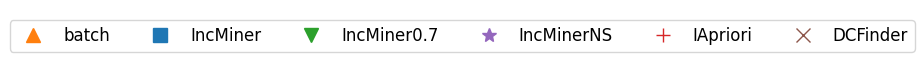

In [13]:
# Create legend elements, skipping "IncMiner1.0"
legend_elements = [
    plt.Line2D([0], [0], color=colorMap[label], marker=markerMap[label], linestyle='', label=label)
    for label in colorMap.keys() if label != "IncMiner1.0"
]

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 1))  # Adjust width and height for a wide flat layout

# Remove axes
ax.axis('off')

# Add the legend
ax.legend(
    handles=legend_elements,
    loc='center',
    frameon=True,
    fontsize=12,
    ncol=len(legend_elements),  # Arrange all legend entries in a single row
)

# Adjust layout
plt.tight_layout()

# Save or display the legend-only plot
plt.savefig("plots/legend.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

In [4]:
ylabel_time = "Running time (s)"

In [5]:
def post_process(_df):
    # 1. Compute scale factor of 'new support' over 'old support'
    _df['supportScale'] = _df['new support'] / _df['old support']

    # 2. Compute absolute difference of 'new confidence' over 'old confidence'
    _df['confDiff'] = _df['new confidence'] - _df['old confidence']
    
    # 3. Assign new label name
    _df['label'] = _df['Baseline'] + _df['beta'].fillna('').astype(str)
    
    # 4. Convert Mining time scale
    _df['time'] = _df['Mining time'] / 1000

    return _df

In [6]:
def compute_speedup(df, baseline_label, target_labels):
    """
    Compute the maximal and average speedup for target labels compared to a baseline label,
    replacing zero values with 1 to avoid division errors.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing timing data.
        baseline_label (str): The label of the baseline group (e.g., 'batch').
        target_labels (list): A list of labels for the groups to compare against the baseline.
    
    Returns:
        dict: A dictionary with the speedup results for each target label.
    """
    # Group by the "label" column
    groups = df.groupby('label')
    
    # Extract baseline times
    if baseline_label not in groups.groups:
        raise ValueError(f"Baseline label '{baseline_label}' not found in data.")
    
    times_baseline = groups.get_group(baseline_label)['time'].replace(0, 1).values  # Replace 0 with 1
    
    # Initialize results dictionary
    speedup_results = {}
    
    # Compute speedup for each target label
    for label in target_labels:
        if label not in groups.groups:
            print(f"Warning: Target label '{label}' not found in data. Skipping.")
            continue
        
        times_target = groups.get_group(label)['time'].replace(0, 1).values  # Replace 0 with 1
        
        # Ensure the baseline and target have the same number of entries
        if len(times_baseline) != len(times_target):
            raise ValueError(f"Mismatch in number of entries for baseline '{baseline_label}' and target '{label}'.")
        
        # Calculate speedup
        speedups = times_baseline / times_target
        
        # Store results
        speedup_results[label] = {
            "max_speedup": speedups.max(),
            "avg_speedup": speedups.mean()
        }
    
    return speedup_results

# Exp-3 : vary K

In [54]:
tab = 'vary K'
df = dfs[tab]
df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,sample number,minimal REE number,prune REE number,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,1,0.7,20,31338,...,2661,3394,0,1001117,32.984990,23.554791,1.0,-0.3,IncMiner0.7,31.338
1,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,2,0.7,20,32152,...,2529,3322,0,1001118,32.405276,23.167539,1.0,-0.3,IncMiner0.7,32.152
2,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.7,20,32757,...,2401,3240,0,1001119,39.759703,30.733261,1.0,-0.3,IncMiner0.7,32.757
3,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,4,0.7,20,33894,...,2324,3283,0,1001120,608.242778,599.016270,1.0,-0.3,IncMiner0.7,33.894
4,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,5,0.7,20,34776,...,2252,3274,0,1001121,830.305297,821.162017,1.0,-0.3,IncMiner0.7,34.776


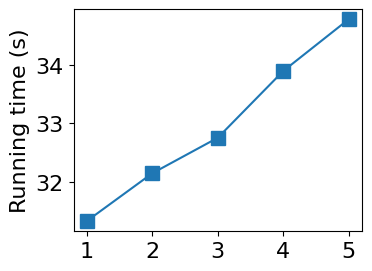

In [55]:
select = df['Baseline'] == 'IncMiner'
X = df[select]["K"]
Y = df[select]["time"] 

plt.figure()
plt.plot(X, Y, marker='s')  
plt.ylabel('Running time (s)')  # Label for the y-axis

xtick_labels = [str(x) for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('K')  # Label for the x-axis
    plt.title('K vs Mining Time')  # Title of the plot
    
outfile = "plots/exp3_hospital_k_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    

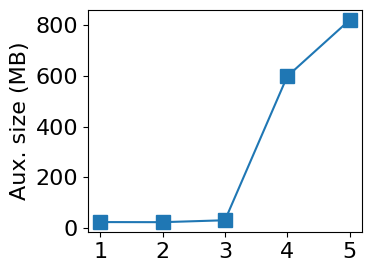

In [56]:
X = df[select]["K"]
Y = df[select]["auxiliary size"] 
# Y = df[select]["sample number"] 

# Plot the data
plt.figure()
plt.plot(X, Y, marker='s') 
plt.ylabel('Aux. size (MB)')  # Label for the y-axis


xtick_labels = [str(x) for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.title(tab)
    plt.xlabel('K')  # Label for the x-axis

outfile = "plots/exp3_hospital_k_storage.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight') 

# Show the plot
plt.show()

**Comments**:

Why at K=1, aux.size is the same as K=3. 
We also expect a positive correlation between K and auxiliary data size.

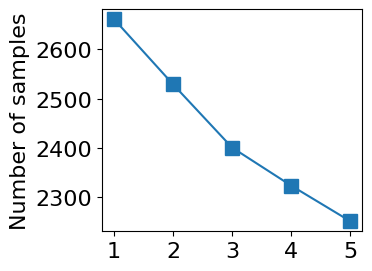

In [57]:
X = df[select]["K"]
Y = df[select]["sample number"] 

# Plot the data
plt.figure()
plt.plot(X, Y, marker="s")  # You can change the color and line style
plt.ylabel('Number of samples')  # Label for the y-axis

xtick_labels = [str(x) for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.title(tab)
    plt.xlabel('K')  # Label for the x-axis

outfile = "plots/exp3_hospital_k_samples.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight') 

# Show the plot
plt.show()

## Vary beta

In [47]:
df = dfs["vary beta"]
df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,sample number,minimal REE number,prune REE number,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.6,20,28135,...,2401,2946,0,1001124,39.128263,30.733261,1.0,-0.3,IncMiner0.6,28.135
1,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.7,20,32921,...,2401,3273,0,1001125,39.933274,30.733261,1.0,-0.3,IncMiner0.7,32.921
2,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.8,20,36763,...,2401,3569,0,1001126,40.540801,30.733261,1.0,-0.3,IncMiner0.8,36.763
3,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.9,20,40981,...,2401,3803,0,1001127,41.052508,30.733261,1.0,-0.3,IncMiner0.9,40.981
4,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,1.0,20,48146,...,2401,4206,0,1001128,41.945583,30.733261,1.0,-0.3,IncMiner1.0,48.146


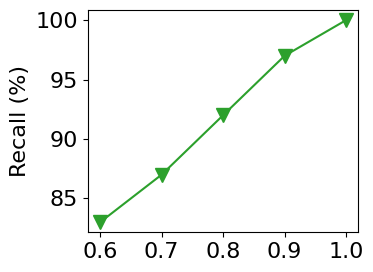

In [53]:

# Assuming 'Sample number' is a column in df and 'Mining time' is another column
X = df["beta"]
Y = (df["recall rate"] * 100).round().astype(int)

# Plot the data
label = "IncMiner0.7"
plt.plot(X, Y, marker=markerMap[label], color=colorMap[label]) 
plt.ylabel('Recall (%)')  # Label for the y-axis

xtick_labels = [f"{x:.1f}" for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('beta')  # Label for the x-axis
    
outfile = "plots/exp3_hospital_beta_recall.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')     

# Show the plot
plt.show()

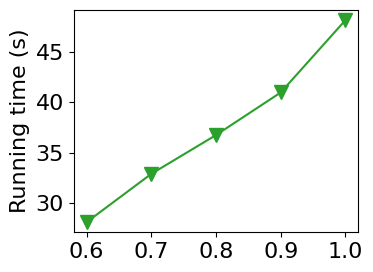

In [52]:
X = df["beta"]
Y = df["time"]

# Plot the data
label = "IncMiner0.7"
plt.plot(X, Y, marker=markerMap[label], color=colorMap[label]) 
plt.ylabel('Running time (s)')  # Label for the y-axis

xtick_labels = [f"{x:.1f}" for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('beta')  # Label for the x-axis
    
outfile = "plots/exp3_hospital_beta_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')  

# Show the plot
plt.show()

## Comments

Now the mining time is too fast. May use a larger dataset.

# Exp-2

## Vary |D|

In [58]:
tab = 'vary |D| size'

df = dfs[tab]
df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,|D| size,Mining time,...,sample number,minimal REE number,prune REE number,output size,auxiliary size,taskId,supportScale,confDiff,label,time
0,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,0.2,6605,...,29,2151,0,46.936460,40.058446,1001091,0.1,-0.1,IncMiner0.7,6.605
1,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,0.4,15312,...,84,2339,0,84.997908,77.681844,1001092,0.1,-0.1,IncMiner0.7,15.312
2,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,0.6,24348,...,84,2568,0,121.800239,113.714255,1001093,0.1,-0.1,IncMiner0.7,24.348
3,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,0.8,32902,...,82,2548,0,156.793378,148.766061,1001094,0.1,-0.1,IncMiner0.7,32.902
4,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,1.0,41009,...,87,2393,0,190.625298,183.046573,1001095,0.1,-0.1,IncMiner0.7,41.009
5,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,0.2,8569,...,29,2609,0,48.029140,40.058446,1001096,0.1,-0.1,IncMiner1.0,8.569
6,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,0.4,19499,...,84,2871,0,86.219383,77.681844,1001097,0.1,-0.1,IncMiner1.0,19.499
7,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,0.6,30715,...,84,3097,0,123.026228,113.714255,1001098,0.1,-0.1,IncMiner1.0,30.715
8,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,0.8,41443,...,82,3060,0,157.959788,148.766061,1001099,0.1,-0.1,IncMiner1.0,41.443
9,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,1.0,52138,...,87,3015,0,192.082544,183.046573,1001100,0.1,-0.1,IncMiner1.0,52.138


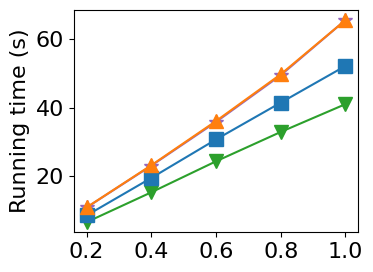

In [59]:
# Group by the "label" column
groups = df.groupby('label')

plt.figure()
for label, group in groups:
    plt.plot(group['|D| size'], group['time'], label=label, color=colorMap[label], marker=markerMap[label]) 

# Plot the data
if VERBOSE:
    plt.legend()
    plt.xlabel('|D|')  # Label for the x-axis
plt.ylabel(ylabel_time)

xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_dblp_d_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')  

# Show the plot
plt.show()



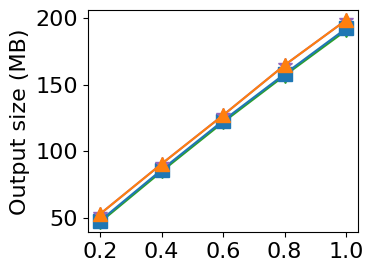

In [60]:
plt.figure()
for label, group in groups:
    plt.plot(group['|D| size'], group['output size'], label=label, color=colorMap[label], marker=markerMap[label]) 

# Plot the data
plt.ylabel('Output size (MB)')  # Label for the y-axis
if VERBOSE:
    plt.xlabel('|D|')  # Label for the x-axis
    plt.title(tab)
    plt.legend()
    
xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_dblp_d_output.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')      
    
# Show the plot
plt.show()

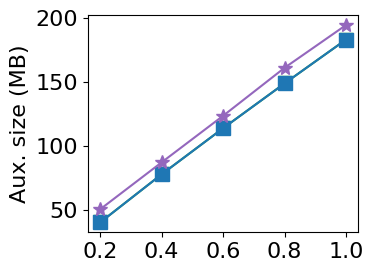

In [61]:
plt.figure()
for label, group in groups:
    if label == 'batch':
        continue
    plt.plot(group['|D| size'], group['auxiliary size'], label=label, color=colorMap[label], marker=markerMap[label]) 

# Plot the data
plt.ylabel('Aux. size (MB)')  # Label for the y-axis
if VERBOSE:
    plt.xlabel('|D|')  # Label for the x-axis
    plt.title(tab)
    plt.legend()
    
xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_dblp_d_aux.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')      

# Show the plot
plt.show()

**Comments**: 

IncMinerNS is expcted to have less auxiliary data 
as it stores no samples.

# Exp-1

## support increase

In [18]:
tab = 'support increase'
df = dfs[tab]
df = post_process(df)
df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.adult,0.000001,0.75,0.00001,0.75,IncMiner,3,0.7,20,0,...,0,2818,0,1001130,136.162771,133.072347,10.0,0.0,IncMiner0.7,0.000
1,inc_rds.adult,0.000001,0.75,0.00010,0.75,IncMiner,3,0.7,20,0,...,0,2818,0,1001131,133.656378,133.072347,100.0,0.0,IncMiner0.7,0.000
2,inc_rds.adult,0.000001,0.75,0.00100,0.75,IncMiner,3,0.7,20,0,...,0,2818,0,1001132,133.587663,133.072347,1000.0,0.0,IncMiner0.7,0.000
3,inc_rds.adult,0.000001,0.75,0.01000,0.75,IncMiner,3,0.7,20,0,...,0,2818,0,1001133,133.359842,133.072347,10000.0,0.0,IncMiner0.7,0.000
4,inc_rds.adult,0.000001,0.75,0.00001,0.75,IncMiner,3,NaN,20,0,...,0,2818,0,1001134,136.162771,133.072347,10.0,0.0,IncMiner,0.000
5,inc_rds.adult,0.000001,0.75,0.00010,0.75,IncMiner,3,NaN,20,0,...,0,2818,0,1001135,133.656378,133.072347,100.0,0.0,IncMiner,0.000
6,inc_rds.adult,0.000001,0.75,0.00100,0.75,IncMiner,3,NaN,20,0,...,0,2818,0,1001136,133.587663,133.072347,1000.0,0.0,IncMiner,0.000
7,inc_rds.adult,0.000001,0.75,0.01000,0.75,IncMiner,3,NaN,20,0,...,0,2818,0,1001137,133.359842,133.072347,10000.0,0.0,IncMiner,0.000
8,inc_rds.adult,0.000001,0.75,0.00001,0.75,IncMinerNS,3,NaN,20,0,...,0,2818,0,1001138,136.162771,133.072347,10.0,0.0,IncMinerNS,0.000
9,inc_rds.adult,0.000001,0.75,0.00010,0.75,IncMinerNS,3,NaN,20,0,...,0,2818,0,1001139,133.656378,133.072347,100.0,0.0,IncMinerNS,0.000


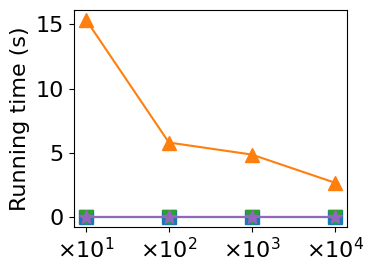

{'IncMiner': {'max_speedup': np.float64(15.359),
  'avg_speedup': np.float64(7.18475)},
 'IncMiner0.7': {'max_speedup': np.float64(15.359),
  'avg_speedup': np.float64(7.18475)}}

In [19]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    X = group['supportScale']
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label]) 

# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis
# plt.xscale("log")

xtick_labels = [fr"$\times 10^{{{int(np.log10(value))}}}$" for value in X]
plt.xticks(range(len(X)), xtick_labels)


if VERBOSE:
    plt.xlabel('supportScale')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_adult_increase_supp.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## support decrease

In [20]:
tab = 'support decrease'
df =dfs[tab]
df = post_process(df)
df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.inspection,0.01,0.75,0.001000,0.75,IncMiner,3,0.7,20,684,...,190,13,0,1001147,29.785847,29.785824,0.1000,0.0,IncMiner0.7,0.684
1,inc_rds.inspection,0.01,0.75,0.000100,0.75,IncMiner,3,0.7,20,3971,...,250,13,0,1001148,30.075494,29.966986,0.0100,0.0,IncMiner0.7,3.971
2,inc_rds.inspection,0.01,0.75,0.000010,0.75,IncMiner,3,0.7,20,35108,...,214,13,0,1001149,30.203930,29.888872,0.0010,0.0,IncMiner0.7,35.108
3,inc_rds.inspection,0.01,0.75,0.000001,0.75,IncMiner,3,0.7,20,78948,...,0,13,0,1001150,30.143009,29.132593,0.0001,0.0,IncMiner0.7,78.948
4,inc_rds.inspection,0.01,0.75,0.001000,0.75,IncMiner,3,NaN,20,759,...,190,13,0,1001151,29.785847,29.785824,0.1000,0.0,IncMiner,0.759
5,inc_rds.inspection,0.01,0.75,0.000100,0.75,IncMiner,3,NaN,20,4041,...,250,13,0,1001152,30.075494,29.966986,0.0100,0.0,IncMiner,4.041
6,inc_rds.inspection,0.01,0.75,0.000010,0.75,IncMiner,3,NaN,20,35637,...,214,13,0,1001153,30.203930,29.888872,0.0010,0.0,IncMiner,35.637
7,inc_rds.inspection,0.01,0.75,0.000001,0.75,IncMiner,3,NaN,20,78978,...,0,13,0,1001154,30.143009,29.132593,0.0001,0.0,IncMiner,78.978
8,inc_rds.inspection,0.01,0.75,0.001000,0.75,IncMinerNS,3,NaN,20,731,...,190,13,0,1001155,29.785847,29.785824,0.1000,0.0,IncMinerNS,0.731
9,inc_rds.inspection,0.01,0.75,0.000100,0.75,IncMinerNS,3,NaN,20,4175,...,250,13,0,1001156,30.075494,29.966986,0.0100,0.0,IncMinerNS,4.175


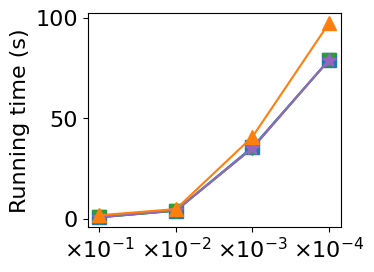

{'IncMiner': {'max_speedup': np.float64(2.2740447957839263),
  'avg_speedup': np.float64(1.4596616851656163)},
 'IncMiner0.7': {'max_speedup': np.float64(2.523391812865497),
  'avg_speedup': np.float64(1.5316648193285465)}}

In [21]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()  # Adjust the figure size if needed

for label, group in groups:
    X = group['supportScale']
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label]) 

# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis
# plt.xscale("log")

xtick_labels = [fr"$\times 10^{{{int(np.log10(value))}}}$" for value in X]
plt.xticks(range(len(X)), xtick_labels)


if VERBOSE:
    plt.xlabel('supportScale')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_decrease_supp.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

**Comments**:

Expect a consistent gap between batch and the rest.
At small \Delta \sigma, the gap is close to zero.

## confidence increase

In [22]:
tab = 'confidence increase'
df =dfs[tab]
df = post_process(df)
df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.inspection,0.000001,0.7,0.000001,0.75,IncMiner,3,0.7,20,3758,...,0,842,0,1001164,44.634087,42.355589,1.0,0.05,IncMiner0.7,3.758
1,inc_rds.inspection,0.000001,0.7,0.000001,0.80,IncMiner,3,0.7,20,10702,...,0,950,0,1001165,45.671486,43.182314,1.0,0.10,IncMiner0.7,10.702
2,inc_rds.inspection,0.000001,0.7,0.000001,0.85,IncMiner,3,0.7,20,20047,...,0,1090,0,1001166,46.749858,44.294758,1.0,0.15,IncMiner0.7,20.047
3,inc_rds.inspection,0.000001,0.7,0.000001,0.90,IncMiner,3,0.7,20,33930,...,0,1197,0,1001167,47.444629,45.117537,1.0,0.20,IncMiner0.7,33.930
4,inc_rds.inspection,0.000001,0.7,0.000001,0.95,IncMiner,3,0.7,20,60356,...,0,1388,0,1001168,48.583530,46.490658,1.0,0.25,IncMiner0.7,60.356
5,inc_rds.inspection,0.000001,0.7,0.000001,0.75,IncMiner,3,NaN,20,3991,...,0,842,0,1001169,44.634087,42.355589,1.0,0.05,IncMiner,3.991
6,inc_rds.inspection,0.000001,0.7,0.000001,0.80,IncMiner,3,NaN,20,10547,...,0,950,0,1001170,45.671486,43.182314,1.0,0.10,IncMiner,10.547
7,inc_rds.inspection,0.000001,0.7,0.000001,0.85,IncMiner,3,NaN,20,20229,...,0,1090,0,1001171,46.749858,44.294758,1.0,0.15,IncMiner,20.229
8,inc_rds.inspection,0.000001,0.7,0.000001,0.90,IncMiner,3,NaN,20,33711,...,0,1197,0,1001172,47.444629,45.117537,1.0,0.20,IncMiner,33.711
9,inc_rds.inspection,0.000001,0.7,0.000001,0.95,IncMiner,3,NaN,20,60401,...,0,1388,0,1001173,48.583530,46.490658,1.0,0.25,IncMiner,60.401


<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_52249/2065341695.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta \delta$")  # Label for x-axis


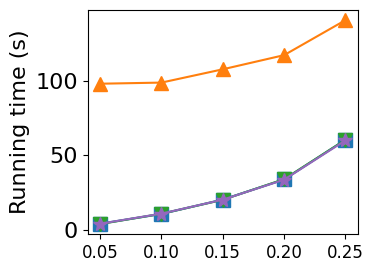

{'IncMiner': {'max_speedup': np.float64(24.564269606614882),
  'avg_speedup': np.float64(9.01260273689126)},
 'IncMiner0.7': {'max_speedup': np.float64(26.08728046833422),
  'avg_speedup': np.float64(9.295599947975292)}}

In [23]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    plt.plot(group['confDiff'], group['time'], label=label, marker=markerMap[label], color=colorMap[label])

# Add plot labels and legend
plt.ylabel(ylabel_time)

if VERBOSE:
    plt.xlabel("$\Delta \delta$")  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
        
plt.tick_params(axis='x', labelsize=12)  

outfile = "plots/exp1_inspection_increase_conf.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## confidence decrease

In [24]:
tab = 'confidence decrease'
df =dfs[tab]
df = post_process(df)
df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.inspection,0.000001,0.95,0.000001,0.90,IncMiner,3,0.7,20,31591,...,0,1673,0,1001185,54.830706,51.662989,1.0,-0.05,IncMiner0.7,31.591
1,inc_rds.inspection,0.000001,0.95,0.000001,0.85,IncMiner,3,0.7,20,35882,...,0,1673,0,1001186,55.833576,51.662989,1.0,-0.10,IncMiner0.7,35.882
2,inc_rds.inspection,0.000001,0.95,0.000001,0.80,IncMiner,3,0.7,20,37396,...,0,1673,0,1001187,56.154242,51.662989,1.0,-0.15,IncMiner0.7,37.396
3,inc_rds.inspection,0.000001,0.95,0.000001,0.75,IncMiner,3,0.7,20,40276,...,0,1673,0,1001188,56.445439,51.662989,1.0,-0.20,IncMiner0.7,40.276
4,inc_rds.inspection,0.000001,0.95,0.000001,0.70,IncMiner,3,0.7,20,42633,...,0,1673,0,1001189,56.490796,51.662989,1.0,-0.25,IncMiner0.7,42.633
5,inc_rds.inspection,0.000001,0.95,0.000001,0.90,IncMiner,3,NaN,20,57060,...,0,1673,0,1001190,56.016563,51.662989,1.0,-0.05,IncMiner,57.060
6,inc_rds.inspection,0.000001,0.95,0.000001,0.85,IncMiner,3,NaN,20,61627,...,0,1673,0,1001191,57.190516,51.662989,1.0,-0.10,IncMiner,61.627
7,inc_rds.inspection,0.000001,0.95,0.000001,0.80,IncMiner,3,NaN,20,62812,...,0,1673,0,1001192,57.875175,51.662989,1.0,-0.15,IncMiner,62.812
8,inc_rds.inspection,0.000001,0.95,0.000001,0.75,IncMiner,3,NaN,20,64818,...,0,1673,0,1001193,58.167629,51.662989,1.0,-0.20,IncMiner,64.818
9,inc_rds.inspection,0.000001,0.95,0.000001,0.70,IncMiner,3,NaN,20,68300,...,0,1673,0,1001194,58.343041,51.662989,1.0,-0.25,IncMiner,68.300


<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_52249/3889084732.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta \delta$")  # Label for x-axis


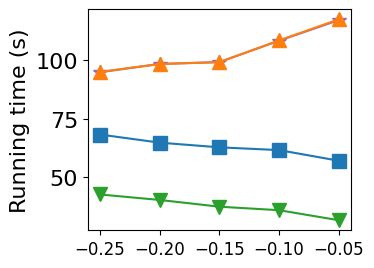

{'IncMiner': {'max_speedup': np.float64(2.061619348054679),
  'avg_speedup': np.float64(1.663406102272861)},
 'IncMiner0.7': {'max_speedup': np.float64(3.7237187806653793),
  'avg_speedup': np.float64(2.8164766011247346)}}

In [25]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    plt.plot(group['confDiff'], group['time'], label=label, marker=markerMap[label], color=colorMap[label])

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis


if VERBOSE:
    plt.xlabel("$\Delta \delta$")  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
plt.tick_params(axis='x', labelsize=12)  

outfile = "plots/exp1_inspection_decrease_conf.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')
# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## s+c+

In [26]:
tab = 'supp inc | conf inc'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.inspection,0.000001,0.7,0.00001,0.75,IncMiner,3,0.7,20,1724,...,447,1242,0,1001206,49.270450,48.505068,10.0,0.05,IncMiner0.7,1.724
1,inc_rds.inspection,0.000001,0.7,0.00010,0.80,IncMiner,3,0.7,20,1390,...,635,1233,0,1001207,49.257092,49.077528,100.0,0.10,IncMiner0.7,1.390
2,inc_rds.inspection,0.000001,0.7,0.00100,0.85,IncMiner,3,0.7,20,644,...,644,1226,0,1001208,49.121155,49.121132,1000.0,0.15,IncMiner0.7,0.644
3,inc_rds.inspection,0.000001,0.7,0.01000,0.90,IncMiner,3,0.7,20,306,...,639,1226,0,1001209,49.101826,49.101803,10000.0,0.20,IncMiner0.7,0.306
4,inc_rds.inspection,0.000001,0.7,0.00001,0.75,IncMiner,3,NaN,20,1749,...,447,1242,0,1001210,49.270450,48.505068,10.0,0.05,IncMiner,1.749
5,inc_rds.inspection,0.000001,0.7,0.00010,0.80,IncMiner,3,NaN,20,1199,...,635,1233,0,1001211,49.257092,49.077528,100.0,0.10,IncMiner,1.199
6,inc_rds.inspection,0.000001,0.7,0.00100,0.85,IncMiner,3,NaN,20,523,...,644,1226,0,1001212,49.121155,49.121132,1000.0,0.15,IncMiner,0.523
7,inc_rds.inspection,0.000001,0.7,0.01000,0.90,IncMiner,3,NaN,20,324,...,639,1226,0,1001213,49.101826,49.101803,10000.0,0.20,IncMiner,0.324
8,inc_rds.inspection,0.000001,0.7,0.00001,0.75,IncMinerNS,3,NaN,20,1753,...,447,1225,0,1001214,49.145951,48.380569,10.0,0.05,IncMinerNS,1.753
9,inc_rds.inspection,0.000001,0.7,0.00010,0.80,IncMinerNS,3,NaN,20,1426,...,635,1225,0,1001215,49.196005,49.016441,100.0,0.10,IncMinerNS,1.426


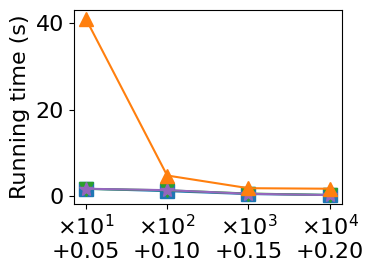

{'IncMiner': {'max_speedup': np.float64(23.39108061749571),
  'avg_speedup': np.float64(9.100206889947602)},
 'IncMiner0.7': {'max_speedup': np.float64(23.730278422273784),
  'avg_speedup': np.float64(8.958531411936285)}}

In [27]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label])
    
xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_s+c+_lambda_rate.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## S+C-

In [28]:
tab = 'supp inc | conf dec'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.adult,0.000001,0.95,0.00001,0.90,IncMiner,3,0.7,20,10431,...,0,4370,0,1001223,261.615252,254.588969,10.0,-0.05,IncMiner0.7,10.431
1,inc_rds.adult,0.000001,0.95,0.00010,0.85,IncMiner,3,0.7,20,11865,...,0,4370,0,1001224,265.522130,254.588969,100.0,-0.10,IncMiner0.7,11.865
2,inc_rds.adult,0.000001,0.95,0.00100,0.80,IncMiner,3,0.7,20,13490,...,0,4370,0,1001225,270.013508,254.588969,1000.0,-0.15,IncMiner0.7,13.490
3,inc_rds.adult,0.000001,0.95,0.01000,0.75,IncMiner,3,0.7,20,15231,...,0,4370,0,1001226,272.994545,254.588969,10000.0,-0.20,IncMiner0.7,15.231
4,inc_rds.adult,0.000001,0.95,0.00001,0.90,IncMiner,3,NaN,20,15526,...,0,4370,0,1001227,262.645682,254.588969,10.0,-0.05,IncMiner,15.526
5,inc_rds.adult,0.000001,0.95,0.00010,0.85,IncMiner,3,NaN,20,17290,...,0,4370,0,1001228,267.302608,254.588969,100.0,-0.10,IncMiner,17.290
6,inc_rds.adult,0.000001,0.95,0.00100,0.80,IncMiner,3,NaN,20,19197,...,0,4370,0,1001229,272.680628,254.588969,1000.0,-0.15,IncMiner,19.197
7,inc_rds.adult,0.000001,0.95,0.01000,0.75,IncMiner,3,NaN,20,21601,...,0,4370,0,1001230,276.356978,254.588969,10000.0,-0.20,IncMiner,21.601
8,inc_rds.adult,0.000001,0.95,0.00001,0.90,IncMinerNS,3,NaN,20,23472,...,0,3849,0,1001231,224.599124,221.755518,10.0,-0.05,IncMinerNS,23.472
9,inc_rds.adult,0.000001,0.95,0.00010,0.85,IncMinerNS,3,NaN,20,7233,...,38,3053,0,1001232,122.746153,122.263788,100.0,-0.10,IncMinerNS,7.233


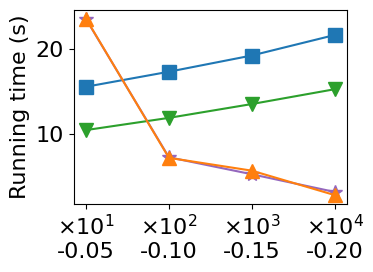

{'IncMiner': {'max_speedup': np.float64(1.5142341878139896),
  'avg_speedup': np.float64(0.5881584994918974)},
 'IncMiner0.7': {'max_speedup': np.float64(2.253858690441952),
  'avg_speedup': np.float64(0.8651211835209276)}}

In [29]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label])
    
xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_adult_s+c-_lambda_rate.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## S-C+

In [30]:
tab = 'supp dec | conf inc'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.inspection,0.01,0.7,0.001000,0.75,IncMiner,3,0.7,20,681,...,191,22,0,1001240,29.843195,29.843172,0.1000,0.05,IncMiner0.7,0.681
1,inc_rds.inspection,0.01,0.7,0.000100,0.80,IncMiner,3,0.7,20,4369,...,263,104,0,1001241,30.714561,30.566128,0.0100,0.10,IncMiner0.7,4.369
2,inc_rds.inspection,0.01,0.7,0.000010,0.85,IncMiner,3,0.7,20,37922,...,229,808,0,1001242,35.380672,35.012808,0.0010,0.15,IncMiner0.7,37.922
3,inc_rds.inspection,0.01,0.7,0.000001,0.90,IncMiner,3,0.7,20,106086,...,0,1569,0,1001243,42.129141,40.623594,0.0001,0.20,IncMiner0.7,106.086
4,inc_rds.inspection,0.01,0.7,0.001000,0.75,IncMiner,3,NaN,20,697,...,191,22,0,1001244,29.843195,29.843172,0.1000,0.05,IncMiner,0.697
5,inc_rds.inspection,0.01,0.7,0.000100,0.80,IncMiner,3,NaN,20,4175,...,263,104,0,1001245,30.714561,30.566128,0.0100,0.10,IncMiner,4.175
6,inc_rds.inspection,0.01,0.7,0.000010,0.85,IncMiner,3,NaN,20,37964,...,229,808,0,1001246,35.380672,35.012808,0.0010,0.15,IncMiner,37.964
7,inc_rds.inspection,0.01,0.7,0.000001,0.90,IncMiner,3,NaN,20,106767,...,0,1569,0,1001247,42.129141,40.623594,0.0001,0.20,IncMiner,106.767
8,inc_rds.inspection,0.01,0.7,0.001000,0.75,IncMinerNS,3,NaN,20,882,...,191,12,0,1001248,29.784322,29.784299,0.1000,0.05,IncMinerNS,0.882
9,inc_rds.inspection,0.01,0.7,0.000100,0.80,IncMinerNS,3,NaN,20,4337,...,263,12,0,1001249,30.141487,29.993054,0.0100,0.10,IncMinerNS,4.337


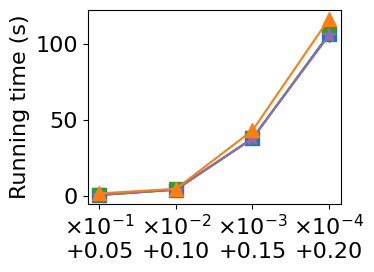

{'IncMiner': {'max_speedup': np.float64(2.5408895265423244),
  'avg_speedup': np.float64(1.4815104765711231)},
 'IncMiner0.7': {'max_speedup': np.float64(2.600587371512481),
  'avg_speedup': np.float64(1.4856987939441149)}}

In [31]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label])
    
xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_s-c+_lambda_rate.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## S-C-

In [32]:
tab = 'supp dec | conf dec'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.adult,0.01,0.95,0.001000,0.90,IncMiner,3,0.7,20,3310,...,317,2643,0,1001257,32.449985,30.730845,0.1000,-0.05,IncMiner0.7,3.310
1,inc_rds.adult,0.01,0.95,0.000100,0.85,IncMiner,3,0.7,20,5042,...,10,2881,0,1001258,40.345242,35.744956,0.0100,-0.10,IncMiner0.7,5.042
2,inc_rds.adult,0.01,0.95,0.000010,0.80,IncMiner,3,0.7,20,11447,...,0,3339,0,1001259,170.402471,162.035967,0.0010,-0.15,IncMiner0.7,11.447
3,inc_rds.adult,0.01,0.95,0.000001,0.75,IncMiner,3,0.7,20,9552,...,0,3217,0,1001260,171.246395,160.883001,0.0001,-0.20,IncMiner0.7,9.552
4,inc_rds.adult,0.01,0.95,0.001000,0.90,IncMiner,3,NaN,20,3424,...,317,2643,0,1001261,32.865417,30.730845,0.1000,-0.05,IncMiner,3.424
5,inc_rds.adult,0.01,0.95,0.000100,0.85,IncMiner,3,NaN,20,5310,...,10,2881,0,1001262,40.746901,35.744956,0.0100,-0.10,IncMiner,5.310
6,inc_rds.adult,0.01,0.95,0.000010,0.80,IncMiner,3,NaN,20,11879,...,0,3339,0,1001263,171.091370,162.035967,0.0010,-0.15,IncMiner,11.879
7,inc_rds.adult,0.01,0.95,0.000001,0.75,IncMiner,3,NaN,20,10043,...,0,3217,0,1001264,172.330168,160.883001,0.0001,-0.20,IncMiner,10.043
8,inc_rds.adult,0.01,0.95,0.001000,0.90,IncMinerNS,3,NaN,20,6779,...,686,2622,0,1001265,53.196917,53.078906,0.1000,-0.05,IncMinerNS,6.779
9,inc_rds.adult,0.01,0.95,0.000100,0.85,IncMinerNS,3,NaN,20,7070,...,38,3053,0,1001266,122.746153,122.263788,0.0100,-0.10,IncMinerNS,7.070


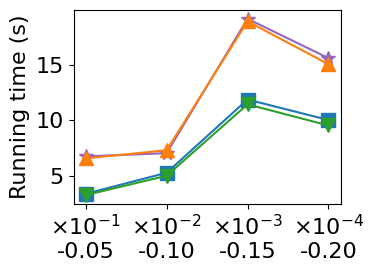

{'IncMiner': {'max_speedup': np.float64(1.9272780373831777),
  'avg_speedup': np.float64(1.5993727362796901)},
 'IncMiner0.7': {'max_speedup': np.float64(1.9936555891238672),
  'avg_speedup': np.float64(1.6685851057601813)}}

In [33]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label])
    
xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_adult_s-c-_lambda_rate.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

**Comments**:

Should exhibit some monotoniciy: the 3rd or 4th data point rerun?

# Change initial parameters

## S+C+

In [34]:
tab = '(old change) supp inc|conf inc'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.inspection,0.000001,0.75,0.00001,0.80,IncMiner,3,0.7,20,2133,...,478,974,0,1001274,41.328444,40.473782,10.00,0.05,IncMiner0.7,2.133
1,inc_rds.inspection,0.000010,0.80,0.00010,0.85,IncMiner,3,0.7,20,2614,...,742,455,0,1001275,34.895712,34.736741,10.00,0.05,IncMiner0.7,2.614
2,inc_rds.inspection,0.000100,0.85,0.00100,0.90,IncMiner,3,0.7,20,3,...,773,281,0,1001276,33.599592,33.599569,10.00,0.05,IncMiner0.7,0.003
3,inc_rds.inspection,0.001000,0.90,0.01000,0.95,IncMiner,3,0.7,20,0,...,773,0,0,1001277,31.665529,31.665506,10.00,0.05,IncMiner0.7,0.000
4,inc_rds.inspection,0.000001,0.75,0.00001,0.80,IncMiner,3,NaN,20,2131,...,478,974,0,1001278,41.328444,40.473782,10.00,0.05,IncMiner,2.131
5,inc_rds.inspection,0.000010,0.80,0.00010,0.85,IncMiner,3,NaN,20,3298,...,742,455,0,1001279,34.895712,34.736741,10.00,0.05,IncMiner,3.298
6,inc_rds.inspection,0.000100,0.85,0.00100,0.90,IncMiner,3,NaN,20,1,...,773,281,0,1001280,33.599592,33.599569,10.00,0.05,IncMiner,0.001
7,inc_rds.inspection,0.001000,0.90,0.01000,0.95,IncMiner,3,NaN,20,0,...,773,0,0,1001281,31.665529,31.665506,10.00,0.05,IncMiner,0.000
8,inc_rds.inspection,0.000001,0.75,0.00001,0.80,IncMinerNS,3,NaN,20,1945,...,478,972,0,1001282,41.311736,40.457074,10.00,0.05,IncMinerNS,1.945
9,inc_rds.inspection,0.000010,0.80,0.00010,0.85,IncMinerNS,3,NaN,20,2907,...,742,432,0,1001283,34.721471,34.562500,10.00,0.05,IncMinerNS,2.907


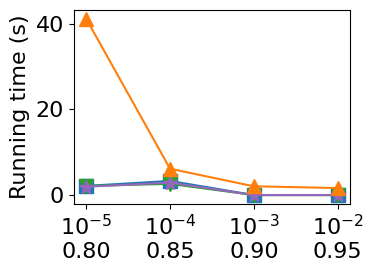

{'IncMiner': {'max_speedup': np.float64(2045.9999999999998),
  'avg_speedup': np.float64(517.2021436964341)},
 'IncMiner0.7': {'max_speedup': np.float64(681.9999999999999),
  'avg_speedup': np.float64(176.31952643829555)}}

In [35]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label])
    
xtick_labels = [fr"$10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['new support'], group['new confidence'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_s+c+_lambda_init.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## S-C-

In [36]:
tab = '(old change) supp dec|conf dec'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,prune REE number,sample number,recall rate,taskId,output size,auxiliary size,supportScale,confDiff,label,time
0,inc_rds.adult,0.01000,0.95,0.001000,0.90,IncMiner,3,0.7,20,3305,...,322,2642,0,1001291,32.434068,30.714929,0.1,-0.05,IncMiner0.7,3.305
1,inc_rds.adult,0.00100,0.90,0.000100,0.85,IncMiner,3,0.7,20,2616,...,10,2621,0,1001292,33.744296,29.018200,0.1,-0.05,IncMiner0.7,2.616
2,inc_rds.adult,0.00010,0.85,0.000010,0.80,IncMiner,3,0.7,20,1631,...,0,1132,0,1001293,21.384106,13.451140,0.1,-0.05,IncMiner0.7,1.631
3,inc_rds.adult,0.00001,0.80,0.000001,0.75,IncMiner,3,0.7,20,173,...,0,0,0,1001294,10.514164,2.454962,0.1,-0.05,IncMiner0.7,0.173
4,inc_rds.adult,0.01000,0.95,0.001000,0.90,IncMiner,3,NaN,20,3401,...,322,2642,0,1001295,32.849500,30.714929,0.1,-0.05,IncMiner,3.401
5,inc_rds.adult,0.00100,0.90,0.000100,0.85,IncMiner,3,NaN,20,3154,...,10,2621,0,1001296,36.242771,29.018200,0.1,-0.05,IncMiner,3.154
6,inc_rds.adult,0.00010,0.85,0.000010,0.80,IncMiner,3,NaN,20,2507,...,0,1132,0,1001297,25.574291,13.451140,0.1,-0.05,IncMiner,2.507
7,inc_rds.adult,0.00001,0.80,0.000001,0.75,IncMiner,3,NaN,20,285,...,0,0,0,1001298,10.553860,2.454962,0.1,-0.05,IncMiner,0.285
8,inc_rds.adult,0.01000,0.95,0.001000,0.90,IncMinerNS,3,NaN,20,6723,...,686,2622,0,1001299,53.196917,53.078906,0.1,-0.05,IncMinerNS,6.723
9,inc_rds.adult,0.00100,0.90,0.000100,0.85,IncMinerNS,3,NaN,20,7065,...,38,3053,0,1001300,122.746153,122.263788,0.1,-0.05,IncMinerNS,7.065


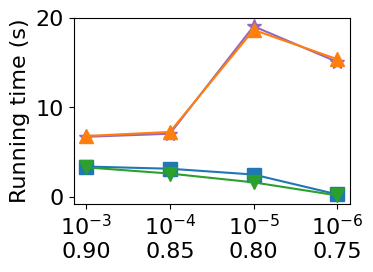

{'IncMiner': {'max_speedup': np.float64(54.00000000000001),
  'avg_speedup': np.float64(16.438167175298247)},
 'IncMiner0.7': {'max_speedup': np.float64(88.95953757225435),
  'avg_speedup': np.float64(26.310844297298917)}}

In [37]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label])
    
xtick_labels = [fr"$10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['new support'], group['new confidence'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_adult_s-c-_lambda_init.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

**Comments**:

Should exhibit some monotoniciy: the 3rd or 4th data point rerun?